<a href="https://colab.research.google.com/github/MuzhaffarRafi/Digital-Skill-Fair-41.0/blob/main/Tugas2_DSF_41_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/hypertension_dataset.csv')

In [ ]:
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


In [ ]:
df.tail()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
1980,56,10.2,0,Normal,6.5,25.0,Diuretic,Yes,Low,Non-Smoker,Yes
1981,29,8.9,4,Hypertension,6.9,16.9,NaN,Yes,High,Non-Smoker,Yes
1982,64,5.9,9,Normal,5.6,18.9,ACE Inhibitor,Yes,Moderate,Non-Smoker,Yes
1983,35,7.4,8,Prehypertension,8.2,29.2,NaN,Yes,Moderate,Non-Smoker,No
1984,38,7.3,0,Normal,8.3,18.6,NaN,Yes,Low,Smoker,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB


In [ ]:
missing_values = df.isnull().sum()
print("\nJumlah missing value per kolom:")
print(missing_values)


Jumlah missing value per kolom:
Age                   0
Salt_Intake           0
Stress_Score          0
BP_History            0
Sleep_Duration        0
BMI                   0
Medication          799
Family_History        0
Exercise_Level        0
Smoking_Status        0
Has_Hypertension      0
dtype: int64


In [ ]:
missing_percentage = (missing_values / len(df)) * 100
print("\nPersentase missing value per kolom:")
print(missing_percentage)


Persentase missing value per kolom:
Age                  0.000000
Salt_Intake          0.000000
Stress_Score         0.000000
BP_History           0.000000
Sleep_Duration       0.000000
BMI                  0.000000
Medication          40.251889
Family_History       0.000000
Exercise_Level       0.000000
Smoking_Status       0.000000
Has_Hypertension     0.000000
dtype: float64


In [ ]:
# Hitung jumlah duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

# Tampilkan beberapa baris duplikat (jika ada)
if duplicates > 0:
    print("\nContoh baris duplikat:")
    print(df[df.duplicated(keep=False)].head(10))

Jumlah baris duplikat: 0


In [ ]:
# Tampilkan tipe data setiap kolom
print(df.dtypes)

# Periksa apakah ada nilai non-numerik dalam kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    non_numeric = df[pd.to_numeric(df[col], errors='coerce').isna()]
    if len(non_numeric) > 0:
        print(f"\nNilai non-numerik dalam kolom {col}:")
        print(non_numeric[col].unique())

Age                   int64
Salt_Intake         float64
Stress_Score          int64
BP_History           object
Sleep_Duration      float64
BMI                 float64
Medication           object
Family_History       object
Exercise_Level       object
Smoking_Status       object
Has_Hypertension     object
dtype: object


In [ ]:
# Cek missing values
print("Missing values sebelum pembersihan:")
print(df.isnull().sum())

# Menangani missing values
for column in df.columns:
    if df[column].dtype == 'object':
        # Untuk kolom kategorikal, isi dengan modus
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Untuk kolom numerik, isi dengan median
        df[column].fillna(df[column].median(), inplace=True)

print("\nMissing values setelah pembersihan:")
print(df.isnull().sum())

Missing values sebelum pembersihan:
Age                   0
Salt_Intake           0
Stress_Score          0
BP_History            0
Sleep_Duration        0
BMI                   0
Medication          799
Family_History        0
Exercise_Level        0
Smoking_Status        0
Has_Hypertension      0
dtype: int64

Missing values setelah pembersihan:
Age                 0
Salt_Intake         0
Stress_Score        0
BP_History          0
Sleep_Duration      0
BMI                 0
Medication          0
Family_History      0
Exercise_Level      0
Smoking_Status      0
Has_Hypertension    0
dtype: int64


In [ ]:
# Cek duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")

# Hapus duplikat
df.drop_duplicates(inplace=True)

print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")

Jumlah baris duplikat: 0
Jumlah baris setelah menghapus duplikat: 1985


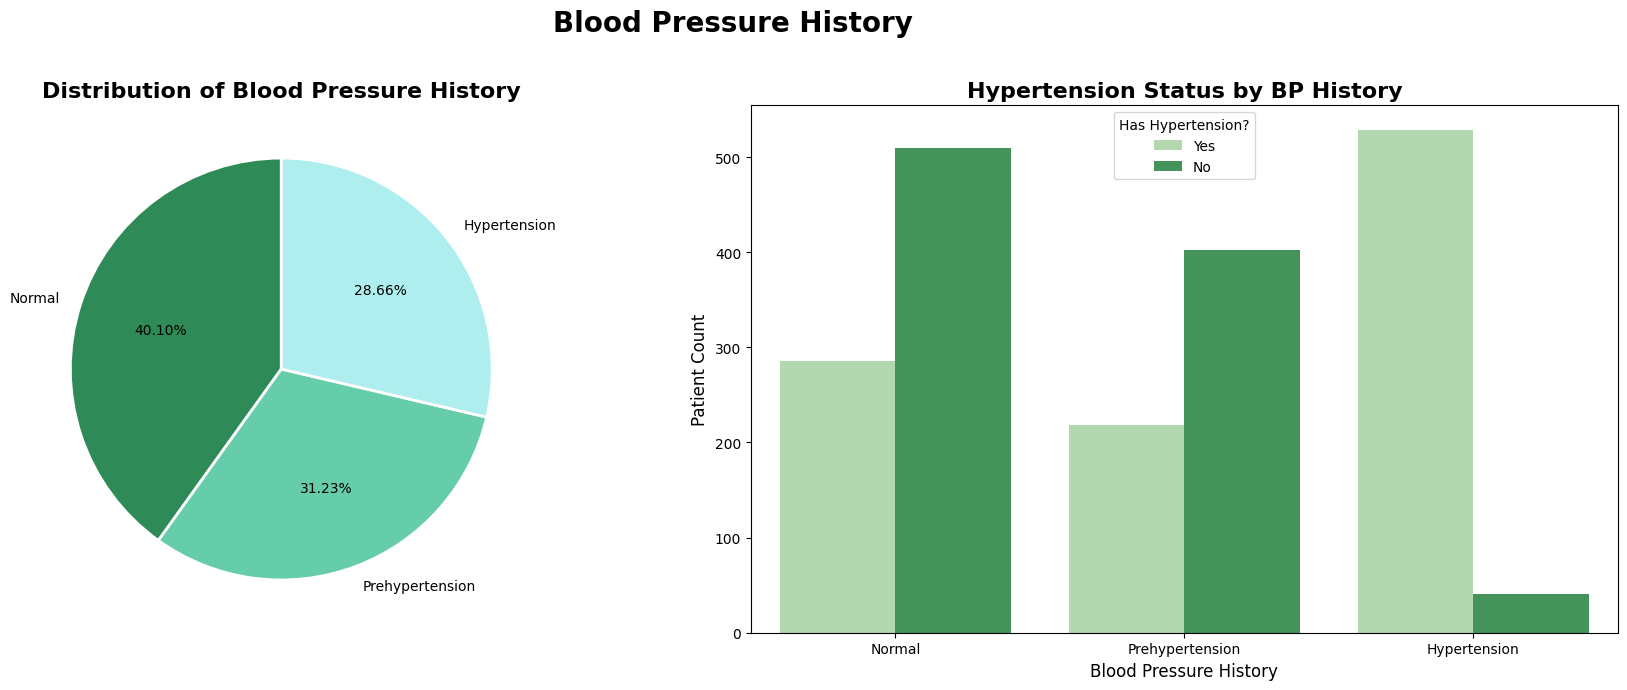

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
bp_counts = df['BP_History'].value_counts()
pie_colors = ['#2E8B57', '#66CDAA', '#AFEEEE']

# pie chart
axes[0].pie(bp_counts,
            labels=bp_counts.index,
            autopct='%.2f%%',
            startangle=90,
            colors=pie_colors,
            wedgeprops={'edgecolor': 'white', 'linewidth': 2})

axes[0].set_title('Distribution of Blood Pressure History', fontsize=16, fontweight='bold')


# Bar Plot
bar_palette = "Greens"
sns.countplot(ax=axes[1],
              data=df,
              x='BP_History',
              hue='Has_Hypertension',
              palette=bar_palette,
              order=bp_counts.index)

axes[1].set_title('Hypertension Status by BP History', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Blood Pressure History', fontsize=12)
axes[1].set_ylabel('Patient Count', fontsize=12)
axes[1].legend(title='Has Hypertension?')

plt.suptitle('Blood Pressure History', fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

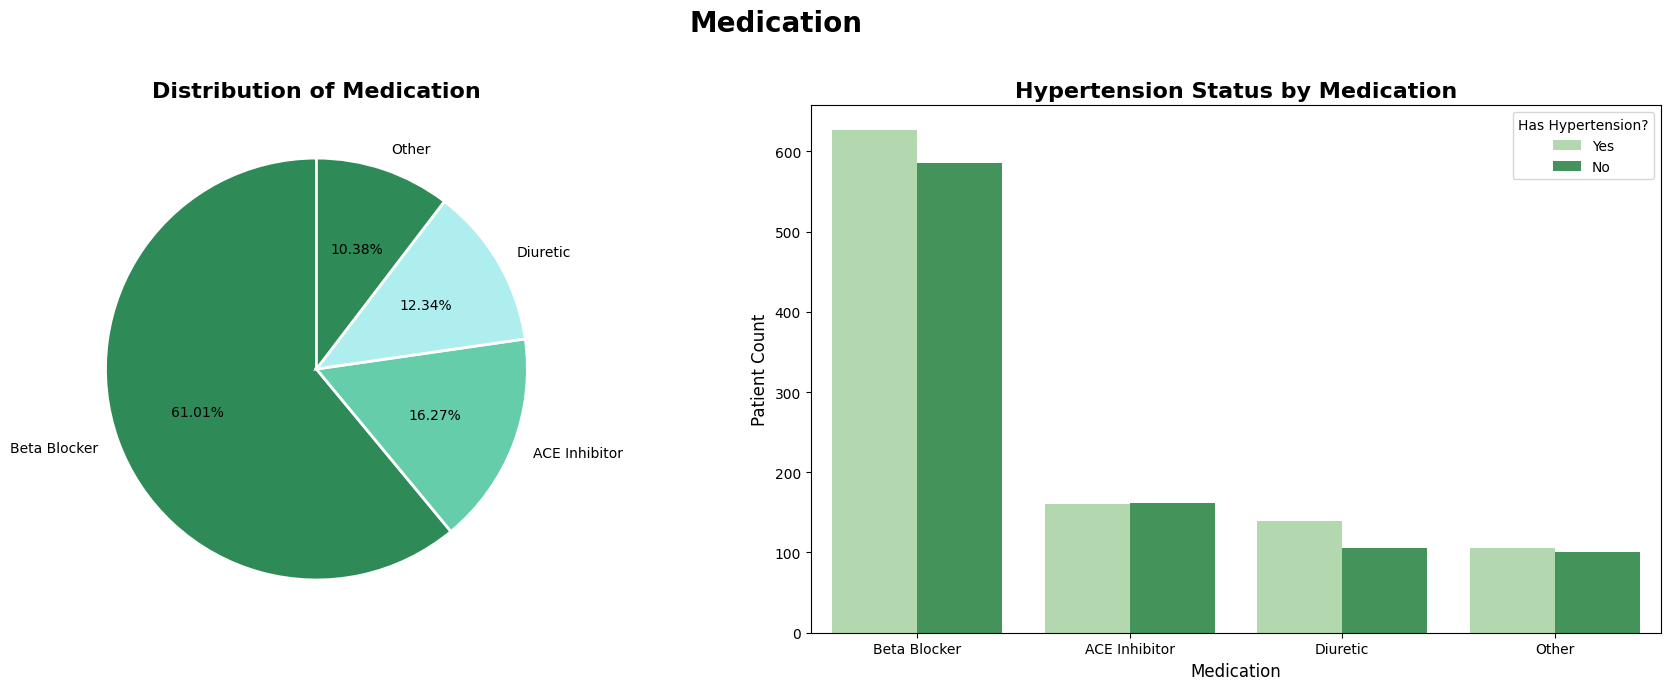

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
bp_counts = df['Medication'].value_counts()
pie_colors = ['#2E8B57', '#66CDAA', '#AFEEEE']

# pie chart
axes[0].pie(bp_counts,
            labels=bp_counts.index,
            autopct='%.2f%%',
            startangle=90,
            colors=pie_colors,
            wedgeprops={'edgecolor': 'white', 'linewidth': 2})

axes[0].set_title('Distribution of Medication', fontsize=16, fontweight='bold')


# Bar Plot
bar_palette = "Greens"
sns.countplot(ax=axes[1],
              data=df,
              x='Medication',
              hue='Has_Hypertension',
              palette=bar_palette,
              order=bp_counts.index)

axes[1].set_title('Hypertension Status by Medication', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Medication', fontsize=12)
axes[1].set_ylabel('Patient Count', fontsize=12)
axes[1].legend(title='Has Hypertension?')

plt.suptitle('Medication', fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


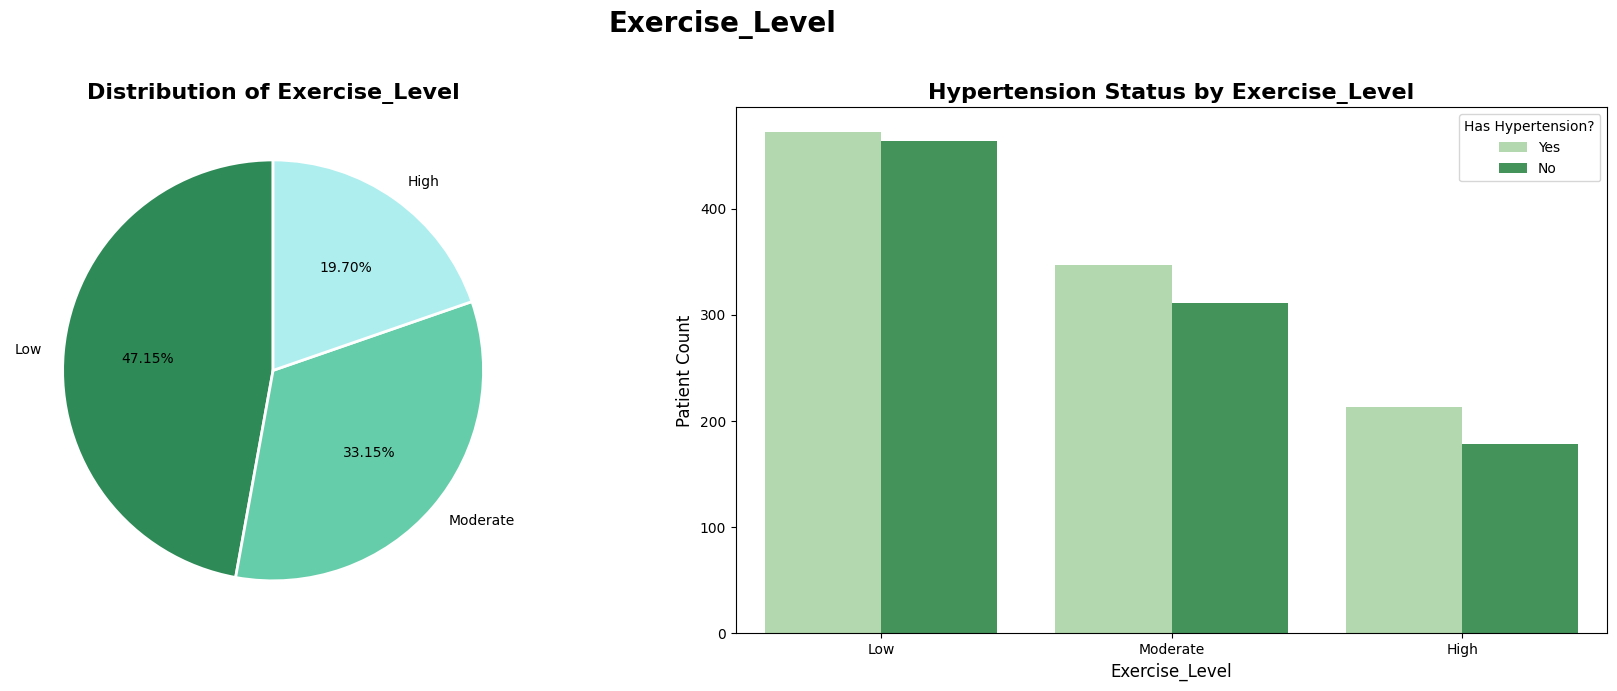

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
bp_counts = df['Exercise_Level'].value_counts()
pie_colors = ['#2E8B57', '#66CDAA', '#AFEEEE']

# pie chart
axes[0].pie(bp_counts,
            labels=bp_counts.index,
            autopct='%.2f%%',
            startangle=90,
            colors=pie_colors,
            wedgeprops={'edgecolor': 'white', 'linewidth': 2})

axes[0].set_title('Distribution of Exercise_Level', fontsize=16, fontweight='bold')


# Bar Plot
bar_palette = "Greens"
sns.countplot(ax=axes[1],
              data=df,
              x='Exercise_Level',
              hue='Has_Hypertension',
              palette=bar_palette,
              order=bp_counts.index)

axes[1].set_title('Hypertension Status by Exercise_Level', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Exercise_Level', fontsize=12)
axes[1].set_ylabel('Patient Count', fontsize=12)
axes[1].legend(title='Has Hypertension?')

plt.suptitle('Exercise_Level', fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

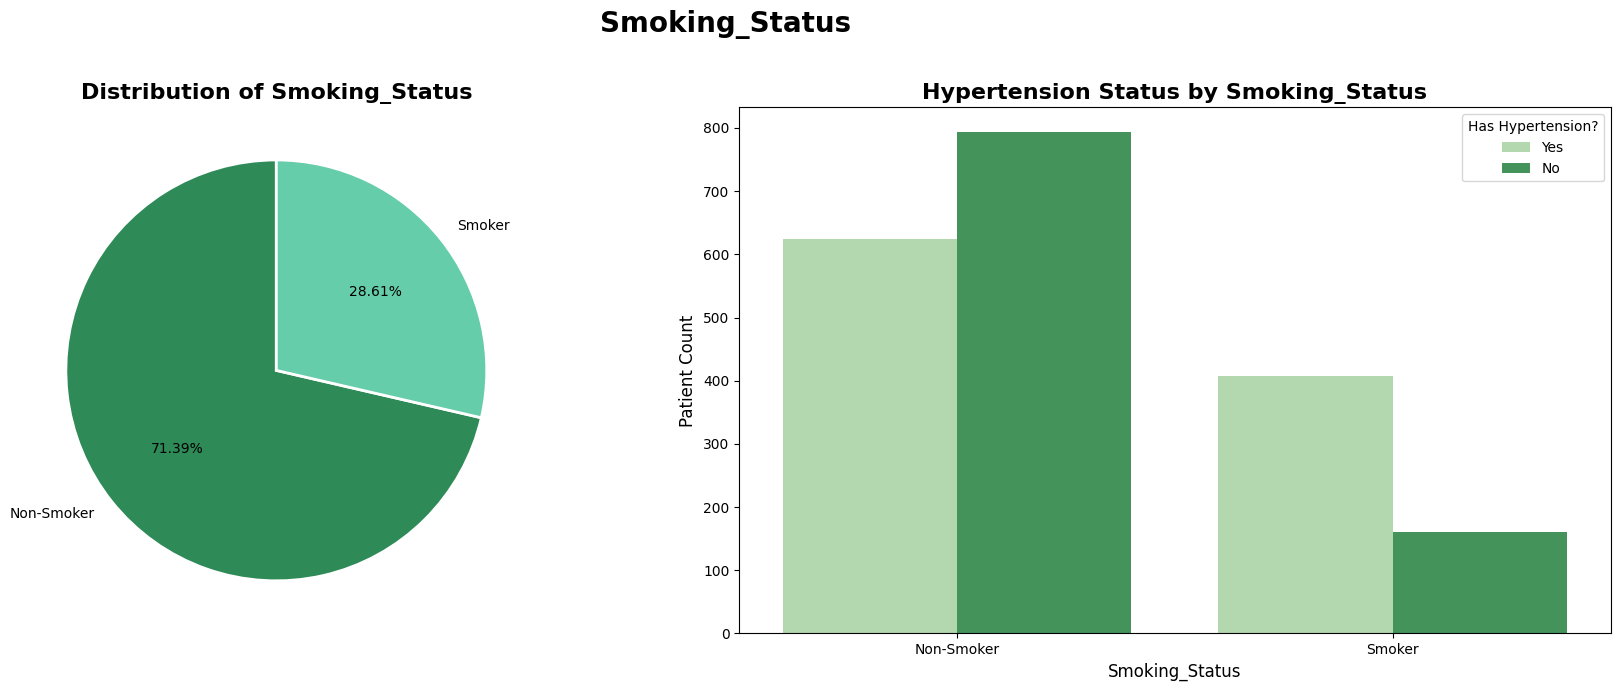

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
bp_counts = df['Smoking_Status'].value_counts()
pie_colors = ['#2E8B57', '#66CDAA', '#AFEEEE']

# pie chart
axes[0].pie(bp_counts,
            labels=bp_counts.index,
            autopct='%.2f%%',
            startangle=90,
            colors=pie_colors,
            wedgeprops={'edgecolor': 'white', 'linewidth': 2})

axes[0].set_title('Distribution of Smoking_Status', fontsize=16, fontweight='bold')


# Bar Plot
bar_palette = "Greens"
sns.countplot(ax=axes[1],
              data=df,
              x='Smoking_Status',
              hue='Has_Hypertension',
              palette=bar_palette,
              order=bp_counts.index)

axes[1].set_title('Hypertension Status by Smoking_Status', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Smoking_Status', fontsize=12)
axes[1].set_ylabel('Patient Count', fontsize=12)
axes[1].legend(title='Has Hypertension?')

plt.suptitle('Smoking_Status', fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

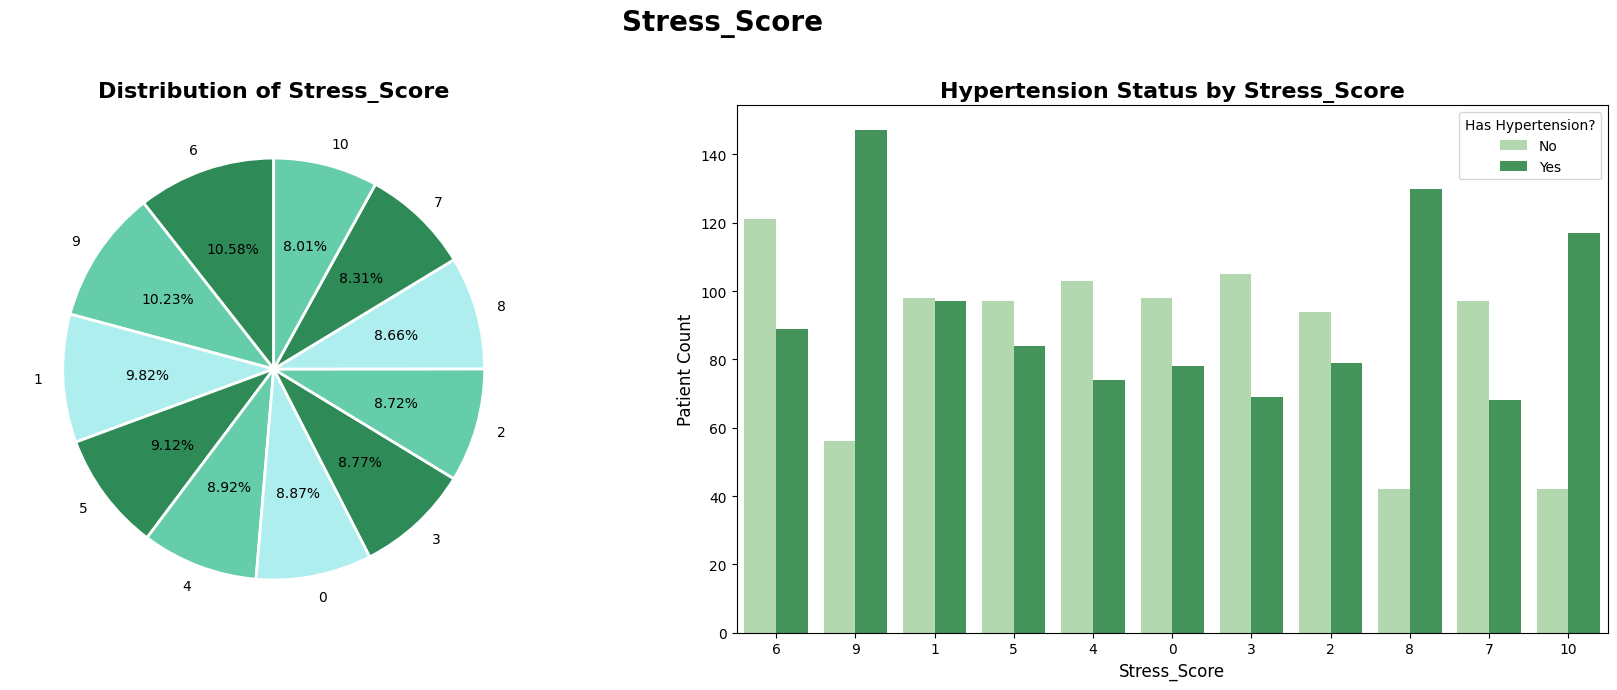

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
bp_counts = df['Stress_Score'].value_counts()
pie_colors = ['#2E8B57', '#66CDAA', '#AFEEEE']

# pie chart
axes[0].pie(bp_counts,
            labels=bp_counts.index,
            autopct='%.2f%%',
            startangle=90,
            colors=pie_colors,
            wedgeprops={'edgecolor': 'white', 'linewidth': 2})

axes[0].set_title('Distribution of Stress_Score', fontsize=16, fontweight='bold')


# Bar Plot
bar_palette = "Greens"
sns.countplot(ax=axes[1],
              data=df,
              x='Stress_Score',
              hue='Has_Hypertension',
              palette=bar_palette,
              order=bp_counts.index)

axes[1].set_title('Hypertension Status by Stress_Score', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Stress_Score', fontsize=12)
axes[1].set_ylabel('Patient Count', fontsize=12)
axes[1].legend(title='Has Hypertension?')

plt.suptitle('Stress_Score', fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

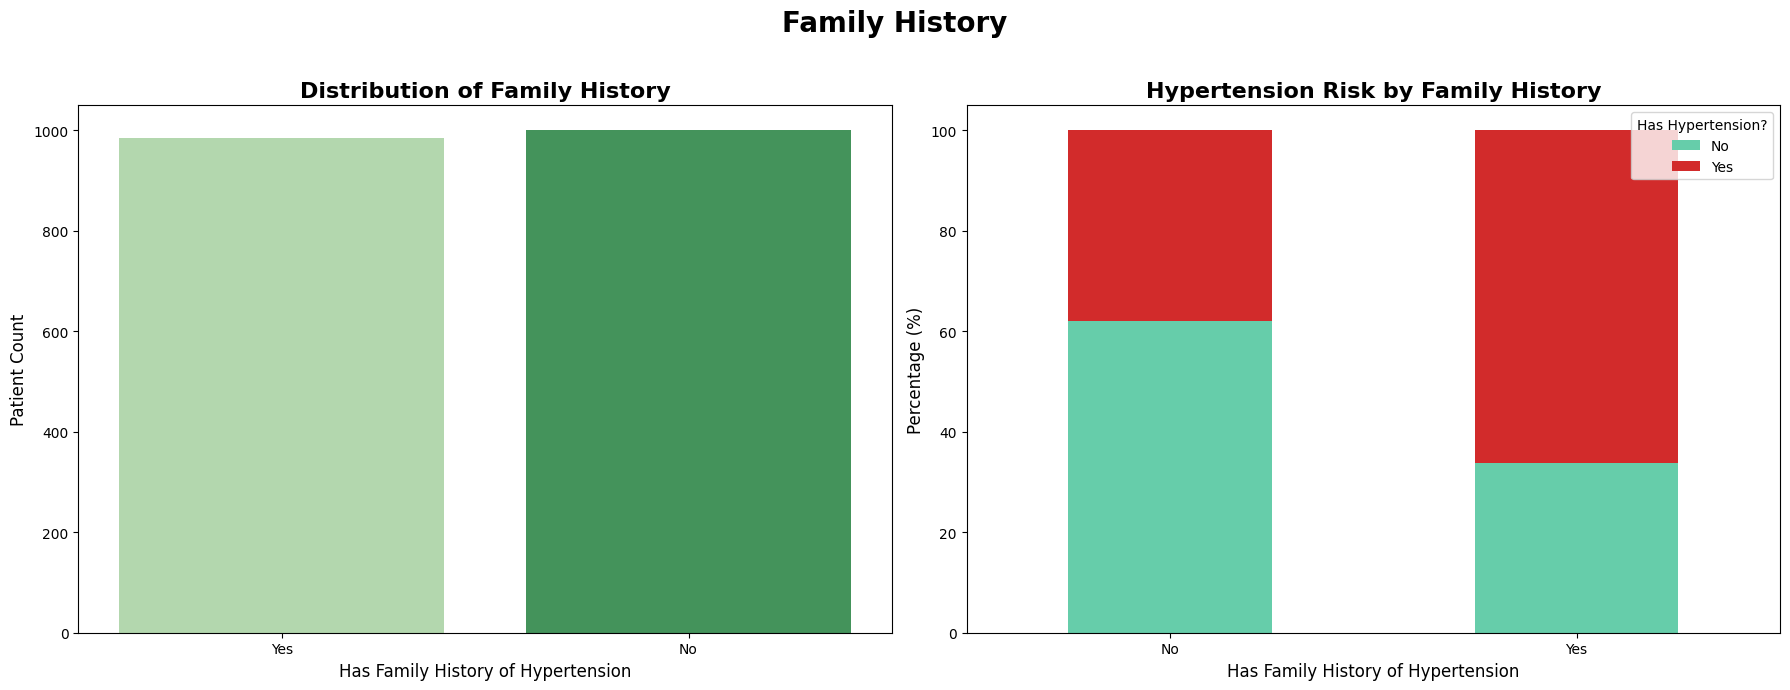

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
sns.countplot(ax=axes[0],
              data=df,
              x='Family_History',
              palette='Greens')

axes[0].set_title('Distribution of Family History', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Has Family History of Hypertension', fontsize=12)
axes[0].set_ylabel('Patient Count', fontsize=12)


crosstab_norm = pd.crosstab(df['Family_History'],
                           df['Has_Hypertension'],
                           normalize='index') * 100

# Plot the 100% stacked bar chart
crosstab_norm.plot(kind='bar',
                   stacked=True,
                   ax=axes[1],
                   color=['#66CDAA', '#D22B2B'])

axes[1].set_title('Hypertension Risk by Family History', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Has Family History of Hypertension', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].legend(title='Has Hypertension?', loc='upper right')
axes[1].tick_params(axis='x', rotation=0)
plt.suptitle('Family History', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

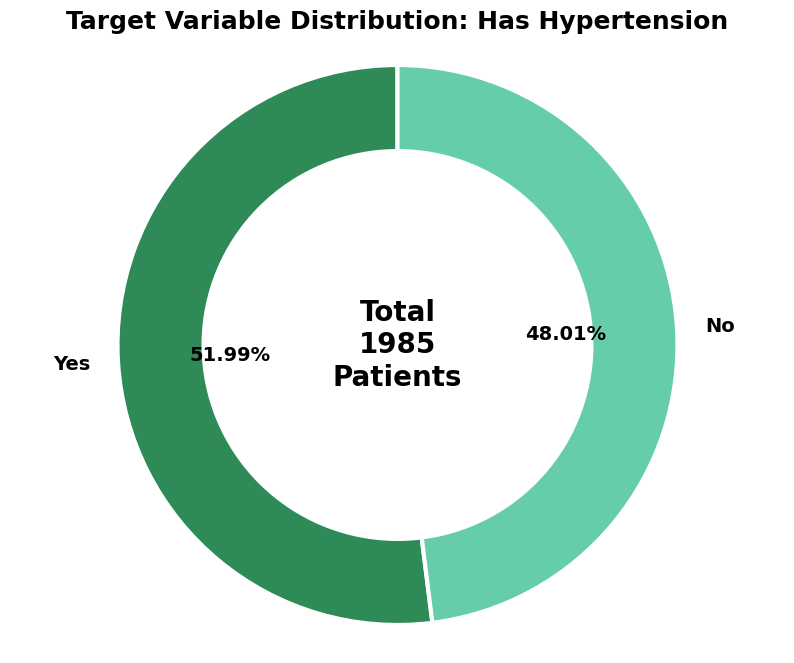

In [ ]:
target_counts = df['Has_Hypertension'].value_counts()

colors = ['#66CDAA', '#2E8B57']
if target_counts.index[0] == 'Yes':
    colors = colors[::-1]

plt.figure(figsize=(10, 8))

plt.pie(target_counts,
        labels=target_counts.index,
        autopct='%.2f%%',
        startangle=90,
        colors=colors,
        textprops={'fontsize': 14, 'fontweight': 'bold'},
        wedgeprops={'edgecolor': 'white', 'linewidth': 3})

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

total_patients = len(df)
plt.text(0, 0, f'Total\n{total_patients}\nPatients',
         ha='center', va='center', fontsize=20, fontweight='bold')


plt.title('Target Variable Distribution: Has Hypertension', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

In [ ]:
df['Has_Hypertension'] = df['Has_Hypertension'].map({'Yes': 1, 'No': 0})
df[['Has_Hypertension']].head()

,Has_Hypertension
0,1
1,0
2,0
3,1
4,0


In [ ]:
df['Medication'].fillna('None', inplace=True)
df['Medication'].isnull().sum()

np.int64(0)

In [ ]:
bp_history_mapping = {'Normal': 0, 'Prehypertension': 1, 'Hypertension': 2}
df['BP_History'] = df['BP_History'].map(bp_history_mapping)
df[['BP_History']].head()

,BP_History
0,0
1,0
2,0
3,2
4,1


In [ ]:
categorical_cols_for_onehot = ['Family_History', 'Exercise_Level', 'Smoking_Status', 'Medication']

df = pd.get_dummies(df, columns=categorical_cols_for_onehot, drop_first=True, dtype=int)
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Has_Hypertension,Family_History_Yes,Exercise_Level_Low,Exercise_Level_Moderate,Smoking_Status_Smoker,Medication_Beta Blocker,Medication_Diuretic,Medication_Other
0,69,8.0,9,0,6.4,25.8,1,1,1,0,0,1,0,0
1,32,11.7,10,0,5.4,23.4,0,0,1,0,0,1,0,0
2,78,9.5,3,0,7.1,18.7,0,0,0,1,0,1,0,0
3,38,10.0,10,2,4.2,22.1,1,0,1,0,0,0,0,0
4,41,9.8,1,1,5.8,16.2,0,0,0,1,0,0,0,1


In [ ]:
correlation_matrix = df.corr(numeric_only=True)
print("Correlation of Features with Has_Hypertension:")
print(correlation_matrix['Has_Hypertension'].sort_values(ascending=False))

Correlation of Features with Has_Hypertension:
Has_Hypertension           1.000000
BP_History                 0.441998
Family_History_Yes         0.282144
Smoking_Status_Smoker      0.251437
Age                        0.210677
Stress_Score               0.186910
BMI                        0.145093
Salt_Intake                0.114415
Medication_Diuretic        0.035637
Exercise_Level_Moderate    0.010509
Medication_Other          -0.003635
Medication_Beta Blocker   -0.007439
Exercise_Level_Low        -0.029544
Sleep_Duration            -0.119561
Name: Has_Hypertension, dtype: float64


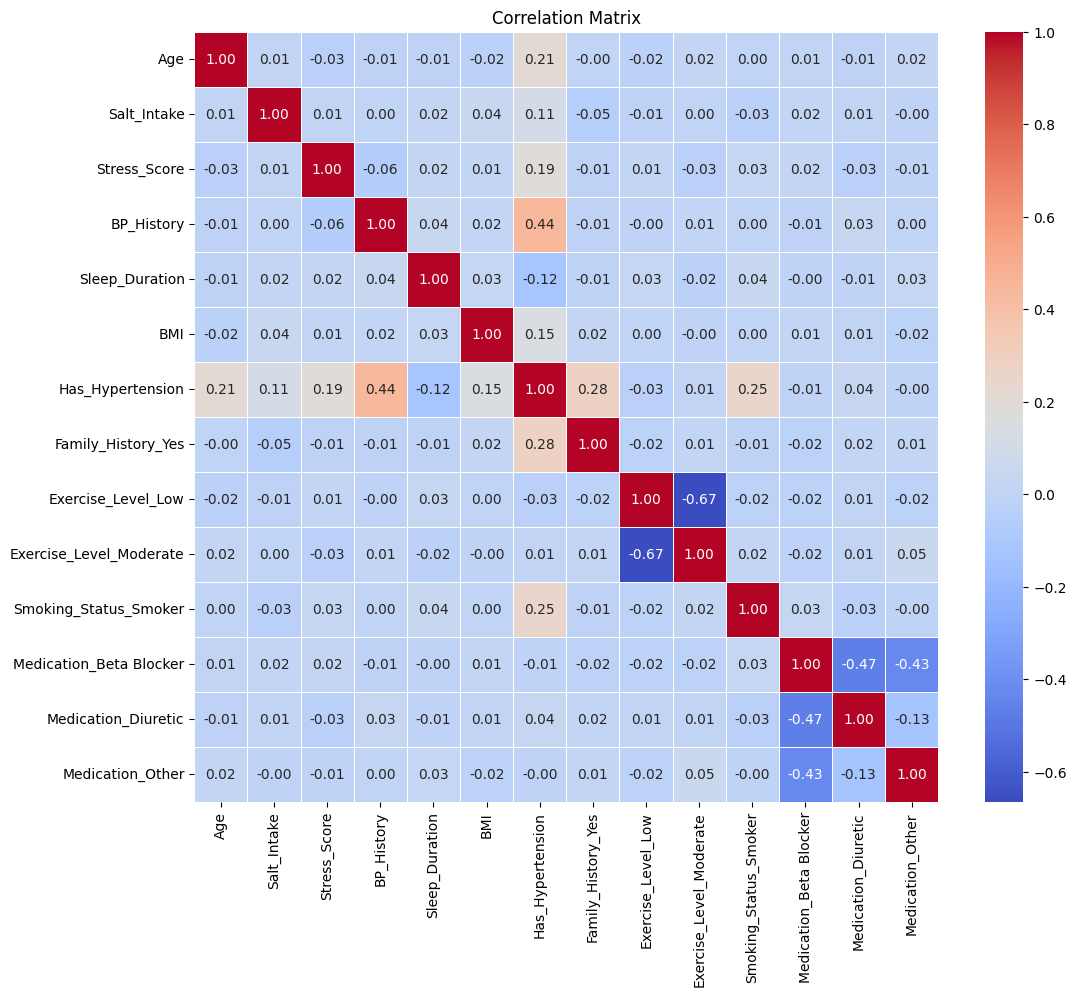

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X = df.drop('Has_Hypertension', axis=1)
y = df['Has_Hypertension']

print("Features (X) Dimension:", X.shape)
print("Target Variable (y) Dimension:", y.shape)

Features (X) Dimension: (1985, 13)
Target Variable (y) Dimension: (1985,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print(f"Training Set Size: {X_train.shape[0]}")
print(f"Test Set Size: {X_test.shape[0]}")

Training Set Size: 1588
Test Set Size: 397


In [ ]:
from sklearn.preprocessing import StandardScaler
numeric_cols_for_scaling = ['Age', 'Salt_Intake', 'Stress_Score', 'Sleep_Duration', 'BMI', 'BP_History']

scaler = StandardScaler()
X_train[numeric_cols_for_scaling] = scaler.fit_transform(X_train[numeric_cols_for_scaling])
X_test[numeric_cols_for_scaling] = scaler.transform(X_test[numeric_cols_for_scaling])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

trained_models = {}

for name, model in models.items():
    print(f"[{name}] The model is being trained...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"[{name}] model training is completed.")

print("\nAll models were trained successfully.")

[Logistic Regression] The model is being trained...
[Logistic Regression] model training is completed.
[Random Forest] The model is being trained...
[Random Forest] model training is completed.
[XGBoost] The model is being trained...
[XGBoost] model training is completed.

All models were trained successfully.



--- Logistic Regression Evaluating the Model ---
Accuracy: 0.8212
F1 Score: 0.8264
ROC-AUC: 0.9191
Confusion Matrix:
 [[157  34]
 [ 37 169]]


<Figure size 600x500 with 0 Axes>

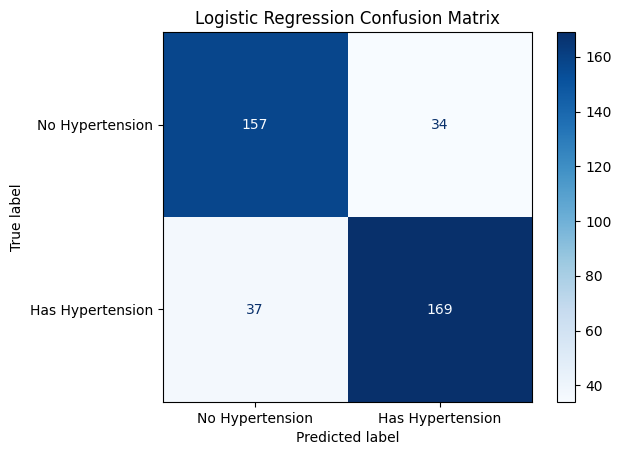


--- Random Forest Evaluating the Model ---
Accuracy: 0.9572
F1 Score: 0.9588
ROC-AUC: 0.9937
Confusion Matrix:
 [[182   9]
 [  8 198]]


<Figure size 600x500 with 0 Axes>

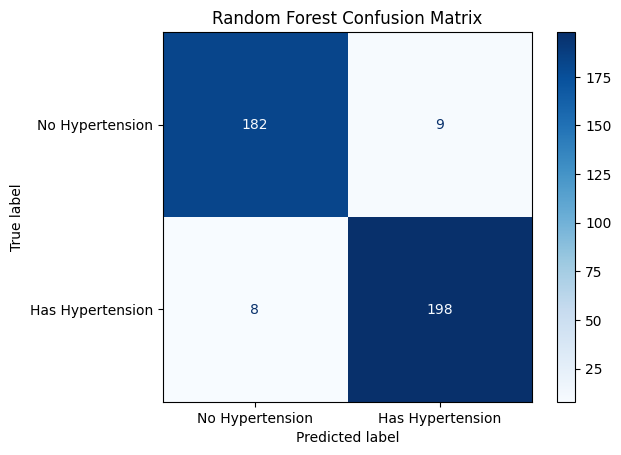


--- XGBoost Evaluating the Model ---
Accuracy: 0.9723
F1 Score: 0.9736
ROC-AUC: 0.9987
Confusion Matrix:
 [[183   8]
 [  3 203]]


<Figure size 600x500 with 0 Axes>

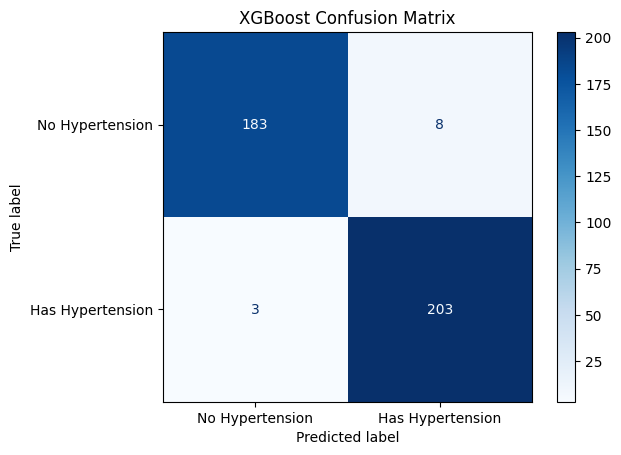

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
results = {}

for name, model in trained_models.items():
    print(f"\n--- {name} Evaluating the Model ---")

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'ROC-AUC': roc_auc,
        'Confusion Matrix': cm
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("Confusion Matrix:\n", cm)

    plt.figure(figsize=(6, 5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Hypertension', 'Has Hypertension'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

In [ ]:
print("Performance Summary of All Models:\n")
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  F1 Score: {metrics['F1 Score']:.4f}")
    print(f"  ROC-AUC: {metrics['ROC-AUC']:.4f}")
    print("-" * 30)

Performance Summary of All Models:

Model: Logistic Regression
  Accuracy: 0.8212
  F1 Score: 0.8264
  ROC-AUC: 0.9191
------------------------------
Model: Random Forest
  Accuracy: 0.9572
  F1 Score: 0.9588
  ROC-AUC: 0.9937
------------------------------
Model: XGBoost
  Accuracy: 0.9723
  F1 Score: 0.9736
  ROC-AUC: 0.9987
------------------------------


In [ ]:
best_model = trained_models['XGBoost']

feature_importances = best_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Attribute Importances from XGBoost Model (Most Important to Least Important):")
print(importance_df)

Attribute Importances from XGBoost Model (Most Important to Least Important):
                    Feature  Importance
3                BP_History    0.354103
9     Smoking_Status_Smoker    0.129480
2              Stress_Score    0.105806
6        Family_History_Yes    0.100784
5                       BMI    0.072814
0                       Age    0.070652
1               Salt_Intake    0.069083
4            Sleep_Duration    0.066572
7        Exercise_Level_Low    0.013253
12         Medication_Other    0.007703
8   Exercise_Level_Moderate    0.006079
10  Medication_Beta Blocker    0.003670
11      Medication_Diuretic    0.000000


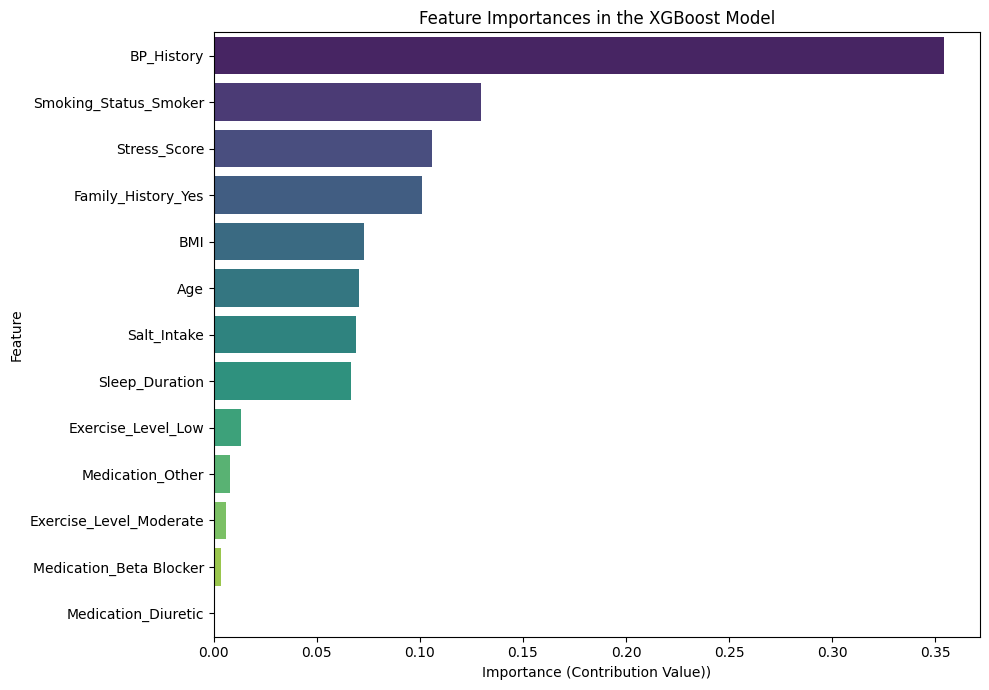

In [ ]:
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances in the XGBoost Model')
plt.xlabel('Importance (Contribution Value))')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()